### Brain MRI Images for Brain Tumor Detection

Importation des donnees 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [2]:
# Chemins vers les dossiers
train_dir = "D:/Projets - Machine - Learning/Brain_MRI_Images_for_Brain_Tumor_Detection/dataBase/train"
test_dir =  "D:/Projets - Machine - Learning/Brain_MRI_Images_for_Brain_Tumor_Detection/dataBase/test"

# Taille des images (redimensionner car les images n'ont pas la meme dimension)
# 224x224 est une taille standard utilisée par beaucoup de modèles pré-entraînés (ex: ResNet, VGG, MobileNet)
IMG_SIZE = (224, 224)

# Chargement des datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    label_mode='int',  # 0 = no, 1 = yes
    batch_size=None,   # Important pour récupérer un seul tensor, pas par batch
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    label_mode='int',
    batch_size=None,
    shuffle=False
)

# Conversion en arrays NumPy
train_images = []
train_labels = []
for img, label in train_ds:
    train_images.append(img.numpy())
    train_labels.append(label.numpy())

test_images = []
test_labels = []
for img, label in test_ds:
    test_images.append(img.numpy())
    test_labels.append(label.numpy())

# Transformer en arrays NumPy complets
train_images = np.stack(train_images)
train_labels = np.array(train_labels)
test_images = np.stack(test_images)
test_labels = np.array(test_labels)

# Regrouper comme dans Fashion MNIST
dataImage = ((train_images, train_labels), (test_images, test_labels))

print("Format final de dataImage :")
print("train_images shape :", dataImage[0][0].shape)
print("train_labels shape :", dataImage[0][1].shape)
print("test_images shape :", dataImage[1][0].shape)
print("test_labels shape :", dataImage[1][1].shape)


Found 253 files belonging to 2 classes.
Found 253 files belonging to 2 classes.
Format final de dataImage :
train_images shape : (253, 224, 224, 3)
train_labels shape : (253,)
test_images shape : (253, 224, 224, 3)
test_labels shape : (253,)


In [3]:
# Afficher quelques étiquettes
print("10 premiers labels d'entraînement :", dataImage[0][1][:1000])


10 premiers labels d'entraînement : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


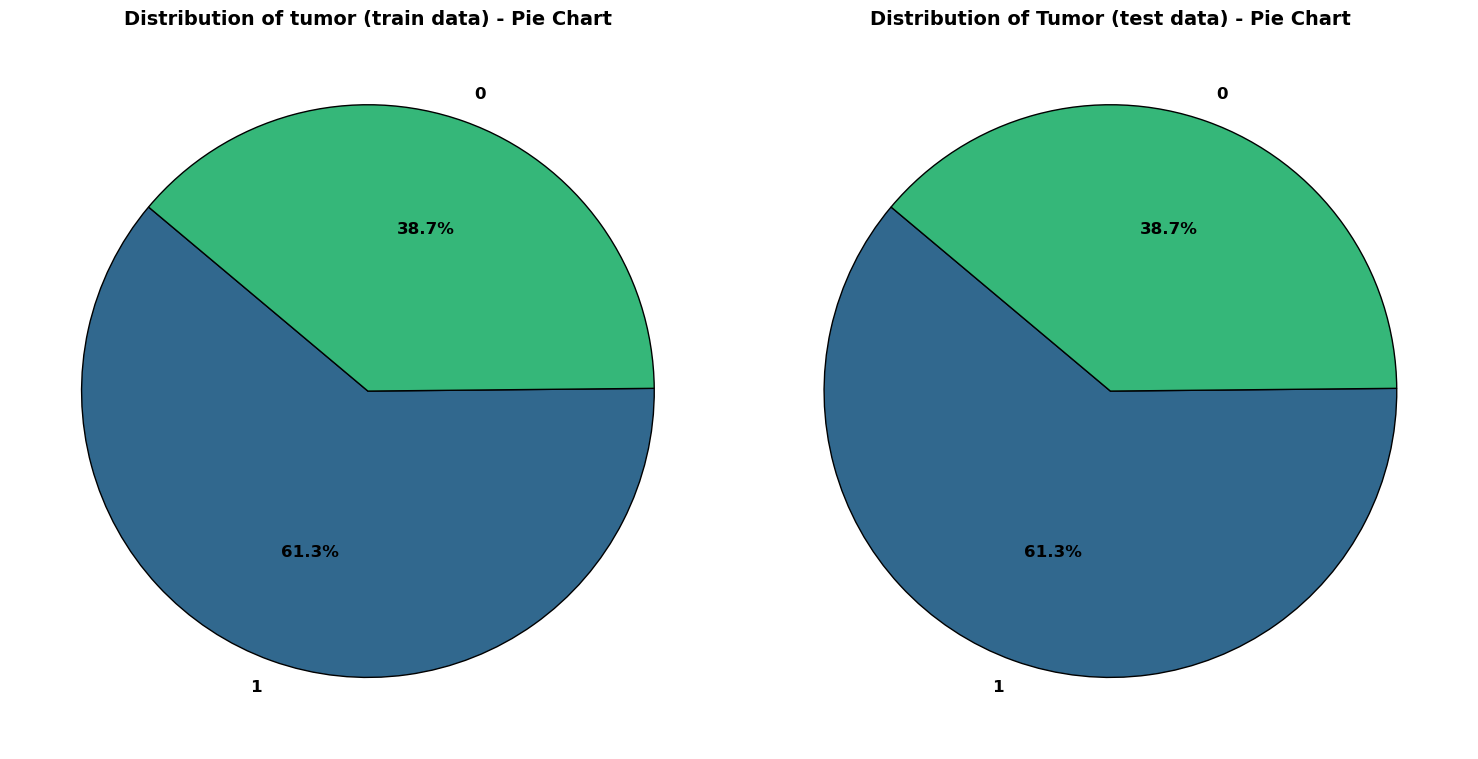

In [4]:

import pandas as pd
import seaborn as sns
train_labels = {"Labels":dataImage[0][1]}
test_labels = {"Labels":dataImage[1][1]}
mydata = pd.DataFrame(train_labels, columns = ['Labels'])
mydata2 = pd.DataFrame(test_labels, columns = ['Labels'])
modalites_ = mydata['Labels'].unique()
effectifs_train_labels = mydata['Labels'].value_counts()
effectifs_test_labels = mydata2['Labels'].value_counts()



fig =plt.figure('myfigure',figsize=(15,15))
# premier cadran
ax = fig.add_subplot(221)
colors = sns.color_palette("viridis", len(effectifs_train_labels))
ax.pie(effectifs_train_labels, labels=effectifs_train_labels.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight':'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of tumor (train data) - Pie Chart", fontsize=14,
             fontweight='bold')
plt.grid()

# deuxieme cadran
ax = fig.add_subplot(222)
colors = sns.color_palette("viridis", len(effectifs_test_labels))
ax.pie(effectifs_test_labels, labels=effectifs_test_labels.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight':'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of Tumor (test data) - Pie Chart", fontsize=14,
             fontweight='bold')
plt.grid()

plt.tight_layout()
plt.show()
plt.cla()
plt.clf()
plt.close()

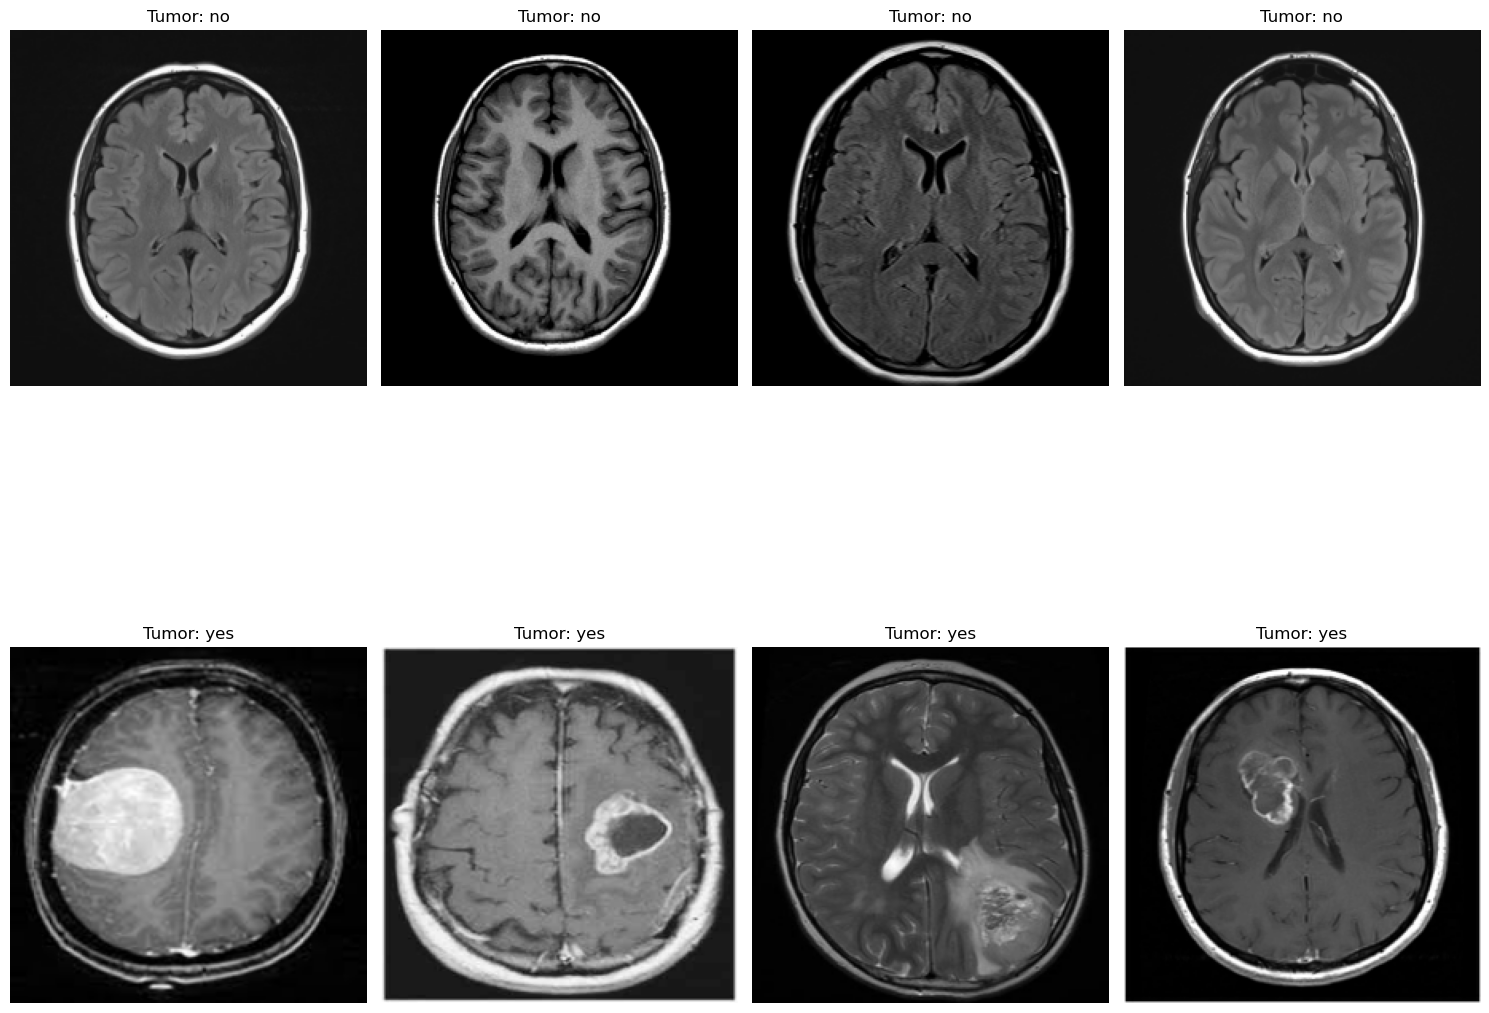

In [5]:
# Extraire les données
(train_images, train_labels), _ = dataImage

# Créer une figure
plt.figure(figsize=(15, 15))

# Boucle pour les 4 premières images
for i in range(8):
    plt.subplot(2,4,i+ 1)  # 2 lignes, 3 colonnes
    plt.imshow(train_images[i+94].astype("uint8"))
    label = train_labels[i+94]
    label_text = "yes" if label == 1 else "no"
    plt.title(f"Tumor: {label_text}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:

(train_images, train_labels), (test_images, test_labels) = dataImage

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


c:\Users\HP_15\anaconda3\envs\ds-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step - accuracy: 0.4760 - loss: 1310.3738 - val_accuracy: 0.6126 - val_loss: 13.9479
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 454ms/step - accuracy: 0.5967 - loss: 7.2066 - val_accuracy: 0.7391 - val_loss: 2.2972
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.7644 - loss: 1.8593 - val_accuracy: 0.8182 - val_loss: 0.9296
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.8675 - loss: 0.6692 - val_accuracy: 0.8300 - val_loss: 0.4890
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.8712 - loss: 0.4267 - val_accuracy: 0.8814 - val_loss: 0.3041
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 444ms/step - accuracy: 0.9050 - loss: 0.2605 - val_accuracy: 0.9209 - val_loss: 0.2564
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - accuracy: 0.9191 - loss: 0.2470 - val_accuracy: 0.9209 - val_loss: 0.1873
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - accuracy: 0.9176 - loss: 0.1985 - val_accuracy: 0.9605 - val_l

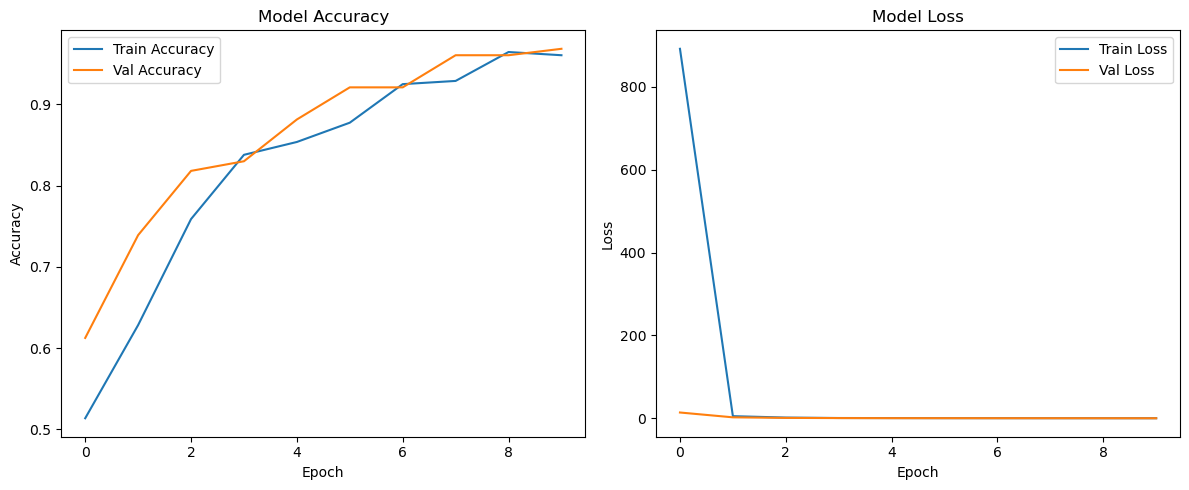

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
plt.tight_layout()
plt.show()

In [8]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred,axis=1)
y_test_classes = np.argmax(test_labels,axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_names))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


AxisError: axis 1 is out of bounds for array of dimension 1